# Building metadata

Here we are going to collect information about all CFGs and CDFGs of the applications and build a metadata database (at `./data/ccpe-applications-information.yaml`).
For each application, information includes:
- Name of the applications
- Location of the file for an application and it respective optimization sequence
- Number of nodes in the graph representation of CFG and CDFG for each application
- The execution time for each application with each optimization sequence

This metadata database must be created only once and will further be used for other purposes, such as generating samples. 

In [1]:
import os
import yaml
import glob
import numpy as np

from collections import defaultdict

from matplotlib import pyplot as plt
from tqdm.contrib.concurrent import thread_map

from utils import yaml_load, yaml_write, get_section

%matplotlib inline

First, lets list all CFG and CDFG files and discover how many nodes each graph has.

In [2]:
# Utility functions

# Get the number of nodes for each application in CFG representation
def get_number_of_cfg_nodes(filename: str) -> tuple:
    """Get the number of nodes in a CFG graph

    Parameters:
        filename (str): Name of the CFG file

    Returns:
        A tuple with the filename and the number of nodes in the graph
    """
    # Get lines for node section
    yaml_nodes_section = get_section(filename, 'nodes_features:')
    # Get the highest node number and return
    return (filename, max([int(node.split(':')[0]) for node in yaml_nodes_section])+1)

# Get the number of nodes for each application in CDFG representation
def get_number_of_cdfg_nodes(filename: str) -> tuple:
    """Get the number of nodes in a CDFG graph

    Parameters:
        filename (str): Name of the CDFG file

    Returns:
        A tuple with the filename and the number of nodes in the graph
    """
    # Get lines for nodes_features section
    yaml_node_features_section = get_section(filename, 'nodes_features:')
    # Get the highest node number and return
    return (filename, max([int(node.split(':')[0]) for node in yaml_node_features_section])+1)

In [3]:
# Listing all CFG Files
cfg_directory = './data/ccpe-dados/cfg.llvm'
cfg_files = glob.glob(f'{cfg_directory}/**/*.yaml', recursive=True)
print(f"Found {len(cfg_files)} files in {cfg_directory}")

# Listing all CDFG Files
cdfg_directory = './data/ccpe-dados/cdfg.programl'
cdfg_files = glob.glob(f'{cdfg_directory}/**/*.yaml', recursive=True)
print(f"Found {len(cdfg_files)} files in {cdfg_directory}")

# Listing all runtime files
runtime_directory = './data/runtime'
runtime_files = glob.glob(f'{runtime_directory}/**/*.yaml', recursive=True)
print(f"Found {len(runtime_files)} files in {runtime_directory}")

# Get the number of nodes for all CFG graphs
cfg_number_of_nodes = thread_map(get_number_of_cfg_nodes, cfg_files, desc='CFG Files processed')
cfg_number_of_nodes = dict(cfg_number_of_nodes)
print(f"Number of CFG graphs: {len(cfg_number_of_nodes)}")

# Get the number of nodes for all CDFG graphs
cdfg_number_of_nodes = thread_map(get_number_of_cdfg_nodes, cdfg_files, desc='CDFG Files processed')
cdfg_number_of_nodes = dict(cdfg_number_of_nodes)
print(f"Number of CDFG graphs: {len(cdfg_number_of_nodes)}")

Found 29990 files in ./data/ccpe-dados/cfg.llvm
Found 29984 files in ./data/ccpe-dados/cdfg.programl
Found 302 files in ./data/runtime


CFG Files processed:   0%|          | 0/29990 [00:00<?, ?it/s]

Number of CFG graphs: 29990


CDFG Files processed:   0%|          | 0/29984 [00:00<?, ?it/s]

Number of CDFG graphs: 29984


Let's print some statistics about all graphs in CFG representation.

Statistics about the number of nodes from CFG graphs of 29990 applications:
    Minimum number of nodes: 3
    Maximum number of nodes: 26796
    Average number of nodes: 808.2788929643215
    Stdev: 2585.113628076723
    
    Mean: 808.2788929643215
    25th percentile: 49.0
    Median: 109.0
    75th percentile: 472.0
    95th percentile: 3815.0999999999985
Histogram of the number of nodes in applications


(array([2.7096e+04, 1.0890e+03, 3.5300e+02, 2.7100e+02, 3.9800e+02,
        1.8000e+02, 4.6000e+01, 3.7000e+01, 4.1000e+01, 2.0000e+01,
        4.0000e+01, 4.8000e+01, 1.1100e+02, 7.3000e+01, 3.9000e+01,
        4.8000e+01, 4.1000e+01, 3.8000e+01, 1.5000e+01, 6.0000e+00]),
 array([3.000000e+00, 1.342650e+03, 2.682300e+03, 4.021950e+03,
        5.361600e+03, 6.701250e+03, 8.040900e+03, 9.380550e+03,
        1.072020e+04, 1.205985e+04, 1.339950e+04, 1.473915e+04,
        1.607880e+04, 1.741845e+04, 1.875810e+04, 2.009775e+04,
        2.143740e+04, 2.277705e+04, 2.411670e+04, 2.545635e+04,
        2.679600e+04]),
 <BarContainer object of 20 artists>)

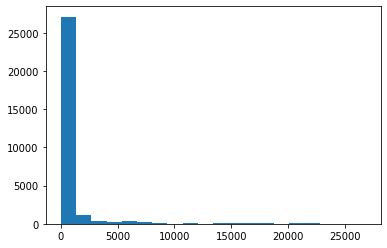

In [4]:
# Print statistics about the number of nodes in graphs with CFG representation
values = [int(v) for v in cfg_number_of_nodes.values()]
print(f"""Statistics about the number of nodes from CFG graphs of {len(values)} applications:
    Minimum number of nodes: {min(values)}
    Maximum number of nodes: {max(values)}
    Average number of nodes: {np.average(values)}
    Stdev: {np.std(values)}
    
    Mean: {np.mean(values)}
    25th percentile: {np.percentile(values, 25)}
    Median: {np.median(values)}
    75th percentile: {np.percentile(values, 75)}
    95th percentile: {np.percentile(values, 95)}""")

print(f'Histogram of the number of nodes in applications')
plt.hist(values, 20)

Statistics about the number of nodes from CFG graphs of 29984 applications:
    Minimum number of nodes: 38
    Maximum number of nodes: 472890
    Average number of nodes: 10924.06423425827
    Stdev: 35517.21571679414
    
    Mean: 10924.06423425827
    25th percentile: 616.0
    Median: 1504.5
    75th percentile: 4881.25
    95th percentile: 58074.69999999997
Histogram of the number of nodes in applications


(array([2.7535e+04, 9.0300e+02, 2.3400e+02, 5.2600e+02, 1.6200e+02,
        7.4000e+01, 9.3000e+01, 1.2100e+02, 7.7000e+01, 3.0000e+01,
        5.8000e+01, 5.2000e+01, 2.1000e+01, 3.8000e+01, 2.1000e+01,
        1.5000e+01, 6.0000e+00, 1.1000e+01, 4.0000e+00, 3.0000e+00]),
 array([3.800000e+01, 2.368060e+04, 4.732320e+04, 7.096580e+04,
        9.460840e+04, 1.182510e+05, 1.418936e+05, 1.655362e+05,
        1.891788e+05, 2.128214e+05, 2.364640e+05, 2.601066e+05,
        2.837492e+05, 3.073918e+05, 3.310344e+05, 3.546770e+05,
        3.783196e+05, 4.019622e+05, 4.256048e+05, 4.492474e+05,
        4.728900e+05]),
 <BarContainer object of 20 artists>)

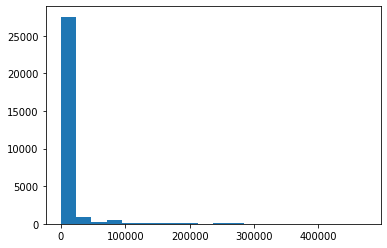

In [5]:
# Print statistics about the number of nodes in graphs with CDFG representation
values = [int(v) for v in cdfg_number_of_nodes.values()]
print(f"""Statistics about the number of nodes from CFG graphs of {len(values)} applications:
    Minimum number of nodes: {min(values)}
    Maximum number of nodes: {max(values)}
    Average number of nodes: {np.average(values)}
    Stdev: {np.std(values)}
    
    Mean: {np.mean(values)}
    25th percentile: {np.percentile(values, 25)}
    Median: {np.median(values)}
    75th percentile: {np.percentile(values, 75)}
    95th percentile: {np.percentile(values, 95)}""")

print(f'Histogram of the number of nodes in applications')
plt.hist(values, 20)

Now we are going to group all CFGs and CDFGs files by its applications and optimization sequences in order to create a database file.
We going to have a metadata dictionary, like this:

```python
{
    # Information about application 1
    application_1: {
        # Application 1 optimized with sequence 0
        0: {
            cfg_file: '/path/to/cfg/file'
            number_cfg_nodes: 10
            cdfg_file: '/path/to/cdfg/file'
            number_cdfg_nodes: 20
            exectime: 1.234
        }
        # Application 1 optimized with sequence 1
        1: {   
            cfg_file: '/path/to/cfg/file'
            number_cfg_nodes: 15
            cdfg_file: '/path/to/cdfg/file'
            number_cdfg_nodes: 22
            exectime: 0.987
        }
    }
    
    # Information about application 2
    application_2: {
        ...
    }
    ...
 }
```

In [6]:
def get_representation(filename: str) -> dict:
    """Given a application filename, generate a dictionary with information about the application with optimization sequences
    
    Returns:
        A dictionary with application and sequences information. E.g.,
            
        # Information about application 1
        application_1: {
            # Application 1 optimized with sequence 0
            0: {
                cfg_file: '/path/to/cfg/file'
                number_cfg_nodes: 10
                cdfg_file: '/path/to/cdfg/file'
                number_cdfg_nodes: 20
                exectime: 1.234
            }
            ...
        }
    """
    
    representation = defaultdict(dict)
    # Extract the application name, without path and extensions
    app_name = os.path.basename(filename)
    app_name = app_name.split('.rnd.yaml')[0]
    
    # Lets group all CFG and CDFG files with same prefix (i.e., CFGs and CDFGs for the same application)
    cfgs_with_prefix = [fname for fname in cfg_files if os.path.basename(fname).startswith(app_name)]
    cdfgs_with_prefix = [fname for fname in cdfg_files if os.path.basename(fname).startswith(app_name)]

    # Get the rutime information for the application. It includes the execution time for the application
    # compiled with different optimization sequences
    app_runtime_info = yaml_load(filename)

    # Group CFGs and CDFGs filenames by their optimization sequences 
    # E.g.: CFGs={0: file1, 1: file2, ..., 99: file99}
    cfgs_with_prefix = {int(os.path.basename(fname).split('.ll.')[0].split('.')[-1]): fname for fname in cfgs_with_prefix}
    cdfgs_with_prefix = {int(os.path.basename(fname).split('.progaml.')[0].split('.')[-1]): fname for fname in cdfgs_with_prefix}

    # Finally, let's group applications with sequence levels and runtime info
    # E.g: representation_files = {app1: {0: (CFG_FILE, CDFG_FILE, EXECTIME), 1: (CFG_FILE, CDFG_FILE, EXECTIME), ..., }, app2: {...} }
    for sequence_no, values in app_runtime_info.items():
        if sequence_no not in cfgs_with_prefix:
            print(f"CFG from application {app_name} with optimization sequence {sequence_no} does not exists. Skipping..")
            continue
        if sequence_no not in cdfgs_with_prefix:
            print(f"CDFG from application {app_name} with optimization sequence {sequence_no} does not exists. Skipping..")
            continue
        representation[app_name][sequence_no] = {
            'cfg_file': cfgs_with_prefix[sequence_no], 
            'number_cfg_nodes': cfg_number_of_nodes[cfgs_with_prefix[sequence_no]],
            'cdfg_file': cdfgs_with_prefix[sequence_no],
            'number_cdfg_nodes': cdfg_number_of_nodes[cdfgs_with_prefix[sequence_no]],
            'exectime': app_runtime_info[sequence_no]['f'],
            'runtime_file': filename
        }
    
    return representation

# Iterate over each runtime file (applications that effectively executed)
representation_files = thread_map(get_representation, runtime_files, desc="Applications processed")
# Merge all dicts to a single dict
representation_files = {k: v for d in representation_files for k, v in d.items()}

print(f'Processed {len(representation_files)} applications...')

Applications processed:   0%|          | 0/302 [00:00<?, ?it/s]

CFG from application cBench.consumer_jpeg_d.0 with optimization sequence 0 does not exists. Skipping..
CFG from application cBench.consumer_jpeg_d.0 with optimization sequence 1 does not exists. Skipping..
CFG from application cBench.consumer_jpeg_d.0 with optimization sequence 2 does not exists. Skipping..
CFG from application cBench.consumer_jpeg_d.0 with optimization sequence 3 does not exists. Skipping..
CFG from application cBench.consumer_jpeg_d.0 with optimization sequence 4 does not exists. Skipping..
CFG from application cBench.consumer_jpeg_d.0 with optimization sequence 5 does not exists. Skipping..
CFG from application cBench.consumer_jpeg_d.0 with optimization sequence 6 does not exists. Skipping..
CFG from application cBench.consumer_jpeg_d.0 with optimization sequence 7 does not exists. Skipping..
CFG from application cBench.consumer_jpeg_d.0 with optimization sequence 8 does not exists. Skipping..
CFG from application cBench.consumer_jpeg_d.0 with optimization sequence 

Finally, the database dictionary is saved to `./data/ccpe-applications-information.yaml`.

In [7]:
# The output file to store processed information
output_metadata_file = './data/ccpe-applications-information.yaml'

# Saving dictionary in YAML format
yaml_write(output_metadata_file, representation_files)
print(f"Metadata information from {len(representation_files)} applications were successfully saved to {output_metadata_file}")

Metadata information from 299 applications were successfully saved to ./data/ccpe-applications-information.yaml
